试求 $\int_{0}^{4} x^{2} e^{-x} dx$

# Prepare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Function to integrate
def f(x):
    return x ** (2) * np.exp(-x)

# upper and lower limits of integration
a, b = 0, 4 # 100 is large enough for the exponential to be close to zero

# Perform the integration
true_value, error = integrate.quad(f, a, b)

# Print the result
print(f"The result of the integration is: {true_value:.4f}")
print(f"The error bound is: {error:.4f}")

The result of the integration is: 1.5238
The error bound is: 0.0000


In [3]:
# Importance Sampling using g(x) = (3/64) * x^2
importance_dist = {
    'sample': lambda n: 4 * np.random.rand(n)**(1/3),  # Inverse CDF sampling
    'pdf': lambda x: (3 / 64) * x**2  # PDF proportional to 3/64 * x^2
}

# Target distribution g(x) = e^(-x), proportional to the exponential distribution PDF
def g(x):
    return np.exp(-x) / (np.exp(-a) - np.exp(-b))

# Without Class

In [4]:
from Monte_Carlo import monte_carlo_integration, stratified_sampling, importance_sampling, metropolis_sampling_with_pbc

In [5]:
#
n_samples = 10 ** 4

# Basic Monte Carlo Integration
mc_estimate, mc_error = monte_carlo_integration(f, a, b, n_samples, true_value, use_seed = True)
print(f"Monte Carlo estimate: {mc_estimate}, Absolute error: {mc_error}")

# Stratified Sampling Integration
stratified_estimate, stratified_error = stratified_sampling(f, a, b, n_samples, strata = 10, true_value = true_value, use_seed = True)
print(f"Stratified Sampling estimate: {stratified_estimate}, Absolute error: {stratified_error}")

# Importance Sampling Integration
importance_estimate, importance_error = importance_sampling(f, a, b, n_samples, true_value, importance_dist, use_seed = True)
print(f"Importance Sampling estimate: {importance_estimate}, Absolute error: {importance_error}")

# Use the Metropolis algorithm
metropolis_samples, acceptance_rate = metropolis_sampling_with_pbc(n_samples, g, a, b, proposal_std = 0.5, init_x = (a + b) / 2, use_seed = True)
weights = metropolis_samples ** 2
integral_estimate = np.mean(weights)
print(f"Estimated integral using Metropolis sampling: {integral_estimate}, Absolute error: {np.abs(integral_estimate - true_value)}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

Monte Carlo estimate: 1.5217457254791067, Absolute error: 0.002047663413804468
Stratified Sampling estimate: 1.5246945822019973, Absolute error: 0.0009011933090861124
Importance Sampling estimate: 1.5395696725403174, Absolute error: 0.015776283647406242
Estimated integral using Metropolis sampling: 1.5378147270572595, Absolute error: 0.014021338164348363
Acceptance rate: 0.7096


# With Class

In [6]:
from Monte_Carlo_Class import MonteCarloIntegrator

In [8]:
#
n_samples = 10 ** 4

# Create the integrator object
integrator = MonteCarloIntegrator(func=f, a=a, b=b, n_samples=n_samples, true_value=true_value, use_seed = True)

# Basic Monte Carlo Integration
mc_estimate, mc_error = integrator.basic_mc()
print(f"Monte Carlo estimate: {mc_estimate}, Absolute error: {mc_error}")

# Stratified Sampling Integration
stratified_estimate, stratified_error = integrator.stratified_sampling(strata = 10)
print(f"Stratified Sampling estimate: {stratified_estimate}, Absolute error: {stratified_error}")

# Importance Sampling Integration
importance_estimate, importance_error = integrator.importance_sampling(importance_dist)
print(f"Importance Sampling estimate: {importance_estimate}, Absolute error: {importance_error}")

# Use the Metropolis algorithm
metropolis_samples, acceptance_rate = integrator.metropolis_sampling_with_pbc(g, proposal_std = 0.5, init_x = (a + b) / 2)
weights = metropolis_samples ** 2
integral_estimate = np.mean(weights)
print(f"Estimated integral using Metropolis sampling: {integral_estimate}, Absolute error: {np.abs(integral_estimate - true_value)}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

Monte Carlo estimate: 1.5217457254791067, Absolute error: 0.002047663413804468
Stratified Sampling estimate: 1.5246945822019973, Absolute error: 0.0009011933090861124
Importance Sampling estimate: 1.5395696725403174, Absolute error: 0.015776283647406242
Estimated integral using Metropolis sampling: 1.5378147270572595, Absolute error: 0.014021338164348363
Acceptance rate: 0.7096


# Compare Variance

## Prepare

In [9]:
# Define different numbers of samples to test
n_samples_list = np.logspace(2, 5, num=20, base=10, dtype=int)

# Number of experiments to run for each sample size
n_exp = 100  # Adjust as needed

## Without Class

In [10]:
from Monte_Carlo import compare

mc_mean, stratified_mean, importance_mean, mc_se, stratified_se, importance_se = compare(n_samples_list, n_exp, f, a, b, true_value, importance_dist)

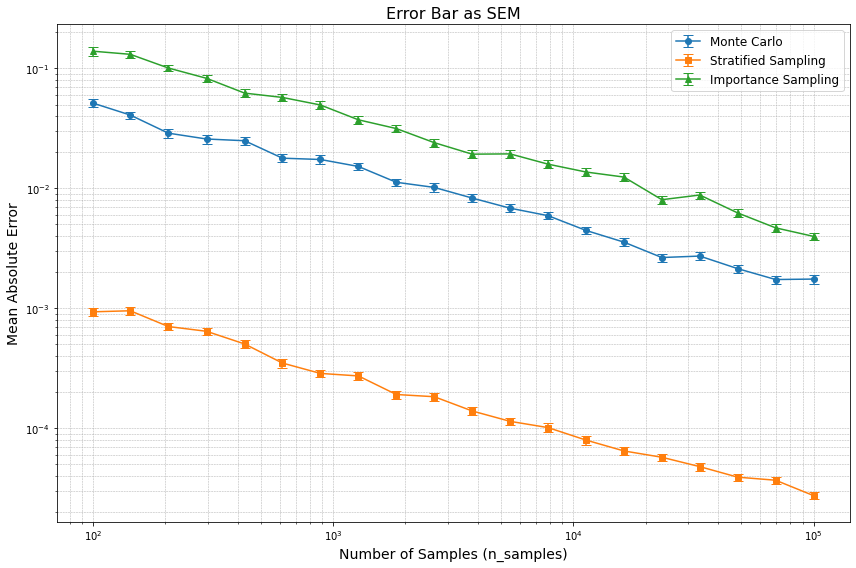

In [11]:
# Create a semilogarithmic plot for absolute errors with error bars
plt.figure(figsize=(12, 8))

# Plot Mean Absolute Errors with Error Bars
plt.errorbar(n_samples_list, mc_mean, yerr=mc_se, fmt='o-', label='Monte Carlo', capsize=5)
plt.errorbar(n_samples_list, stratified_mean, yerr=stratified_se, fmt='s-', label='Stratified Sampling', capsize=5)
plt.errorbar(n_samples_list, importance_mean, yerr=importance_se, fmt='^-', label='Importance Sampling', capsize=5)

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Labels and Title
plt.xlabel('Number of Samples (n_samples)', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.title('Error Bar as SEM', fontsize=16)

# Legend
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

## With Class

In [12]:
mc_mean, stratified_mean, importance_mean, mc_se, stratified_se, importance_se = integrator.compare(n_samples_list, n_exp, importance_dist)

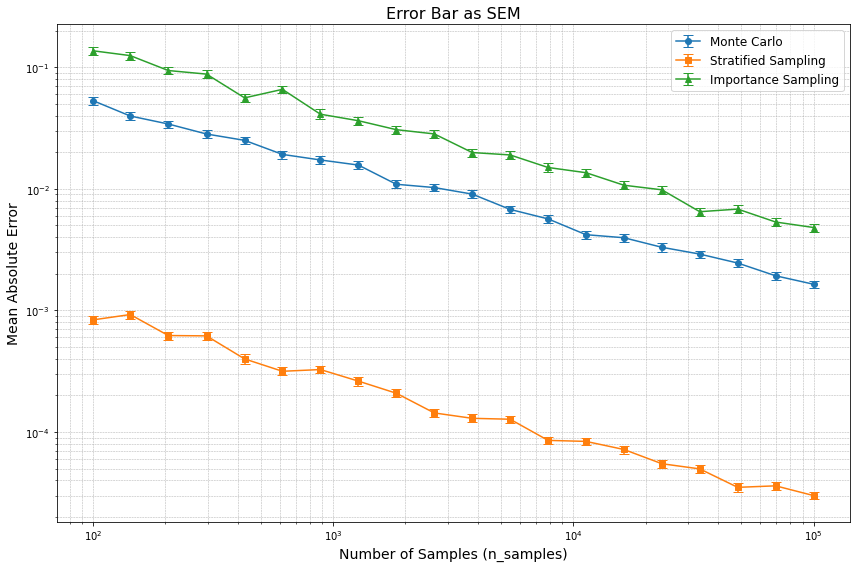

In [13]:
# Create a semilogarithmic plot for absolute errors with error bars
plt.figure(figsize=(12, 8))

# Plot Mean Absolute Errors with Error Bars
plt.errorbar(n_samples_list, mc_mean, yerr=mc_se, fmt='o-', label='Monte Carlo', capsize=5)
plt.errorbar(n_samples_list, stratified_mean, yerr=stratified_se, fmt='s-', label='Stratified Sampling', capsize=5)
plt.errorbar(n_samples_list, importance_mean, yerr=importance_se, fmt='^-', label='Importance Sampling', capsize=5)

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Labels and Title
plt.xlabel('Number of Samples (n_samples)', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.title('Error Bar as SEM', fontsize=16)

# Legend
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()